In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
from fastai.vision.all import *
from matplotlib import patches
import torch
import numpy as np
import os

In [3]:
path = Path("/home/kavindu99/data/kaggle/flood-detection")
path.ls()

(#2) [Path('/home/kavindu99/data/kaggle/flood-detection/images'),Path('/home/kavindu99/data/kaggle/flood-detection/labels')]

In [5]:
path_im = path/"images"
path_lbl = path/"labels"

path_im.ls(), path_lbl.ls()

((#441) [Path('/home/kavindu99/data/kaggle/flood-detection/images/image_374.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_303.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_346.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_385.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_133.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_117.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_427.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_244.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_230.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_322.jpg')...],
 (#441) [Path('/home/kavindu99/data/kaggle/flood-detection/labels/label_373.png'),Path('/home/kavindu99/data/kaggle/flood-detection/labels/label_168.png'),Path('/home/kavindu99/data/kaggle/flood-detection/labels/label_384.png'),Path('/home/kavindu99/data/k

In [6]:
fnames = get_image_files(path_im)
lnames = get_image_files(path_lbl)
fnames, lnames

((#441) [Path('/home/kavindu99/data/kaggle/flood-detection/images/image_374.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_303.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_346.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_385.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_133.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_117.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_427.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_244.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_230.jpg'),Path('/home/kavindu99/data/kaggle/flood-detection/images/image_322.jpg')...],
 (#441) [Path('/home/kavindu99/data/kaggle/flood-detection/labels/label_373.png'),Path('/home/kavindu99/data/kaggle/flood-detection/labels/label_168.png'),Path('/home/kavindu99/data/kaggle/flood-detection/labels/label_384.png'),Path('/home/kavindu99/data/k

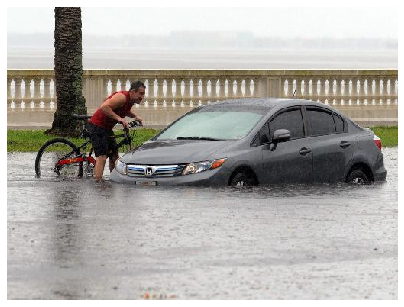

In [9]:
idx = 15

img_fn = fnames[idx]
img = PILImage.create(img_fn)
img.show(figsize=(7,7))

In [44]:
get_mask = lambda o: path/'labels'/str('label_'+o.stem.split('_')[1]+'.png')

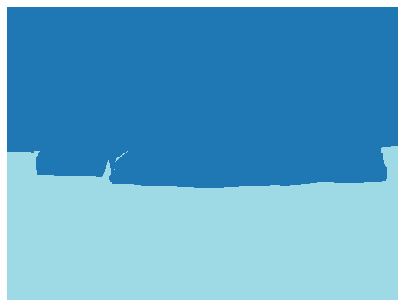

In [45]:
msk = PILMask.create(get_mask(img_fn))
msk.show(figsize=(7,7), alpha=1)

In [52]:
m = tensor(msk).squeeze(1) != 0

tensor(msk)[m], tensor(msk)[m].shape, tensor(msk).shape

(tensor([1, 1, 1,  ..., 1, 1, 1], dtype=torch.uint8),
 torch.Size([81035]),
 torch.Size([384, 512]))

In [55]:
sz = msk.shape
sz

(384, 512)

In [56]:
h_sz = tuple(int(x/2) for x in sz)
h_sz

(192, 256)

In [58]:
codes = ['bg', 'flood']

In [61]:
db = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=get_mask,
                   batch_tfms=[*aug_transforms(size=h_sz), Normalize.from_stats(*imagenet_stats)])

/home/kavindu99/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:146: UserWarning: 
NVIDIA GeForce RTX 3050 Laptop GPU with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the NVIDIA GeForce RTX 3050 Laptop GPU GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


In [62]:
dls = db.dataloaders(path_im, bs=8)

RuntimeError: CUDA error: no kernel image is available for execution on the device
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.